Nt_RK45: 99


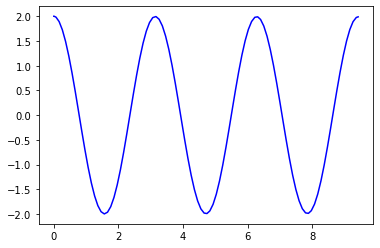

N_t: 480
9.42477796076938


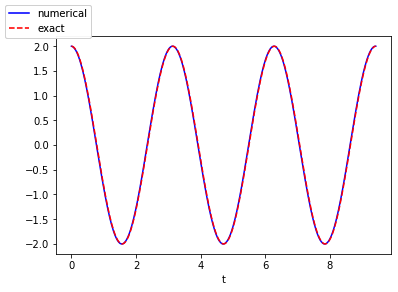

1.9999509520801000 -0.0048465045772330


In [1]:
from math import e
from scipy import integrate as inte
import matplotlib.pyplot as plt

#RK45 input: (function, t0, y0, t_bound, max_step)

def g(t,Y):
    y=Y[0]
    v=Y[1]
    dydt=v
    dvdt=-4*y
    return [dydt,dvdt]
#print (g[3])

#for i in range(len(y_values)):
solution1 = inte.RK23(g, 0, [2,0], 9.42477796076938, 0.1) #vectorized=True)
t_values1 = []
y_values1 = []
for i in range(1000):
# get solution step state
    solution1.step() #implemented function in scipy to collect data
    t_values1.append(solution1.t)
    y_values1.append(solution1.y[0])
    # break loop after modeling is finished
    if solution1.status == 'finished':
        break
#print (y_values1)   

#plt.plot(t_values, y_values, 'b-')
print ("Nt_RK45:", len(t_values1))
plt.plot(t_values1, y_values1, 'b-')
plt.show()

from numpy import zeros, linspace, pi, cos
import matplotlib.pyplot as plt
 
omega = 2
P = 2*pi/omega
dt = P/160 # P/40, P/160, P/2000 for comparison
T = 3*P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)
print('N_t:', N_t)
 
u = zeros(N_t+1)
v = zeros(N_t+1)
 
# Initial condition
X_0 = 2
u[0] = X_0
v[0] = 0
  
# Step equations forward in time
for n in range(N_t):
    v[n+1] = v[n] - dt*omega**2*u[n]
    u[n+1] = u[n] + dt*v[n+1]
  
 # Plot the last four periods to illustrate the accuracy
 # in long time simulations
fig = plt.figure()
print (t[-1])

l1, l2 = plt.plot(t, u, 'b-', t, X_0*cos(omega*t), 'r--')
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
plt.xlabel('t')
plt.show()
 #plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
print('%.16f %.16f' % (u[-1], v[-1]))